![PNS](http://caillau.perso.math.cnrs.fr/logo-pns.png)
## MAM4 - EDP1
# TP 2 - Équation d'advection

## Exercice 1. Schéma explicite

On résout numériquement l'équation d'advection sur $\Omega:=]0,L[$ avec conditions aux limites périodiques.

$$ \left\{\begin{array}{l}
\displaystyle \frac{\partial u}{\partial t}(x,t)+V\frac{\partial
  u}{\partial x}(x,t)=0,x\in\Omega,\,t\ge 0,\\
\displaystyle u(x,0)=u_0(x),\,x\in \Omega,\\
u(0,t)=u(L,t),\,t\ge 0.
\end{array}\right. $$

Pour simplifier on a supposé que la donnée initale
est périodique de période $L$. On vérifie aisément que la
solution exacte est donnée par $u(x,t)=u_0(x-Vt)$.

On cherche à approcher numériquement la solution par le schéma *décentré amont* suivant:

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}+V\frac{u_j^n-u_{j-1}^n}{\Delta x}=0 $$ 

o\`u $u_j^n\cong u(x_j,t_n),\,0\le j\le N$, $\Delta x=L/N$,
$x_j=j\Delta x$ et $t_n = n\Delta t$. En réarrangeant les termes, on obtient

$$ u_j^{n+1}=u_j^n-\sigma(u_j^n-u_{j-1}^n) $$

o\`u $\sigma=\displaystyle\frac{V\Delta t}{\Delta x}$ est connu sous le nom de [*nombre de Courant*](https://fr.wikipedia.org/wiki/Nombre_de_Courant).
Pour approcher la condition initiale et la condition limite on écrit

$$ u_j^0=u_0(x_j),\,0\le j\le N,\, u_0^n = u_N^n,\,n\ge 0. $$

Augmenter progressivement le paramètre $\sigma$ et observer le résultat. Quelle est la valeur critique ? Constater aussi en augmentant progressivement `Nt` que la solution numérique est amortie au fil des itérations en temps (phénomène de diffusion numérique).

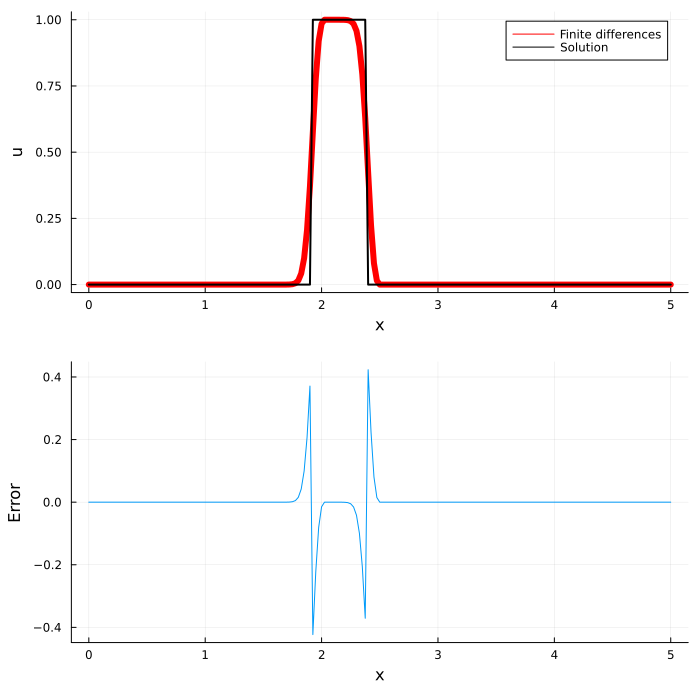

Δx: 0.025	 Δt:0.225	 max error: 0.4231306530931628


In [41]:
using LinearAlgebra, Plots
  
# Parameters
V = 0.1                                             # advection speed
L = 5                                               # domain length
Nx = 200                                            # space grid size
x = range(0, L, length = Nx+1)                      # space grid
Δx = x[2]-x[1]                                      # space stepsize
σ = 0.9                                             # Courant number
Δt = σ*Δx/V                                         # time stepsize
Nt = 40                                             # time grid size     
tf = Nt * Δt                                        # final time
condinit = x -> Float64.((x.>1.0) .& (x.<1.5))      # characteristic function
#condinit = x -> sin.(8*π*x/L)                      # sine pulse
u0 = condinit(x)                                    # initial condition

# Explicit scheme
u = u0
for n = 1:Nt
    uold = u
    u[2:end] = uold[2:end]-σ*(uold[2:end]-uold[1:end-1])
    u[1] = u[end]
end

uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

On remarque que pour la première condition initiale, la valeur critique de σ est 1, à partir de cette valeur le schéma explicite n'est plus stable. 
Pour la deuxième condition initiale (celle du sinus), la valeur critique de σ est aussi 1, on le remarque encore mieux en augmentant Nt.
On constate également que la diffusion du schéma augmente plus Nt est grand.

## Exercice 2. Schéma de Lax-Wendroff
En suivant le modèle précédent, implémenter le schéma suivant :

$$
u_j^{n+1}=u_j^n-\frac{\sigma}{2}(u_{j+1}^n-u_{j-1}^n)+\frac{\sigma^2}{2}(u_{j+1}^n-2u_j^n+u_{j-1}^n).
$$

Dans ce nouveau script au tout début, à l'intérieur de la boucle en temps on va fixer la condition à un des bords (condition entrante) :

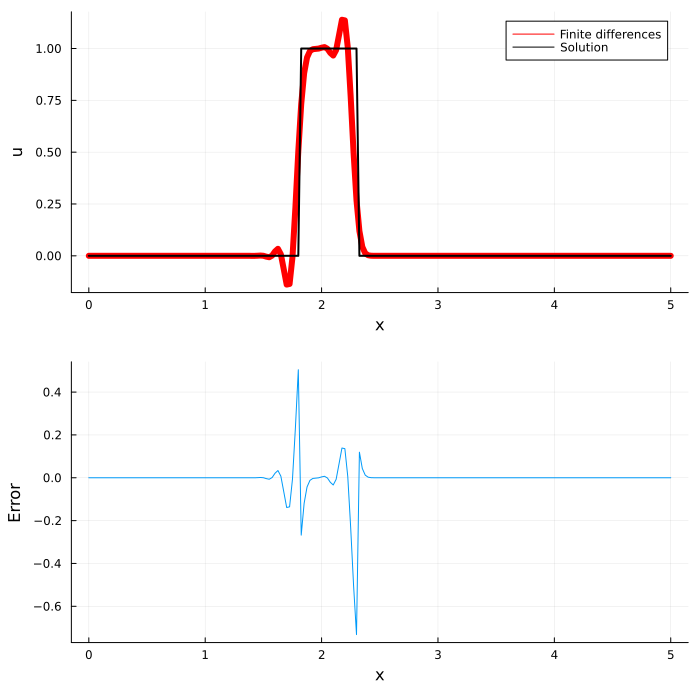

Δx: 0.025	 Δt:0.20000000000000004	 max error: 0.7321642239029105


In [25]:
# Parameters
V = 0.1                                             # advection speed
L = 5                                               # domain length
Nx = 200                                            # space grid size
x = range(0, L, length = Nx+1)                      # space grid
Δx = x[2]-x[1]                                      # space stepsize
σ = 0.8                                               # Courant number
Δt = σ*Δx/V                                         # time stepsize
Nt = 40                                             # time grid size     
tf = Nt * Δt                                        # final time
condinit = x -> Float64.((x.>1.0) .& (x.<1.5))      # characteristic function
#condinit = x -> sin.(8*π*x/L)                      # sine pulse
u0 = condinit(x)                                    # initial condition

# Lax-Wendroff scheme
u = u0
for n = 1:Nt
    uold = u
    u[2:end-1] = uold[2:end-1]-(σ/2)*(uold[3:end]-uold[1:end-2])+(σ*σ/2)*(uold[3:end]-2*uold[2:end-1]+uold[1:end-2])
    u[1] = u[end]
end

uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

Repartir de $\sigma=0.8$ et essayer 4 possibilités du couple conditions initiale/schéma numérique. 

Schéma explicite avce conditions 1


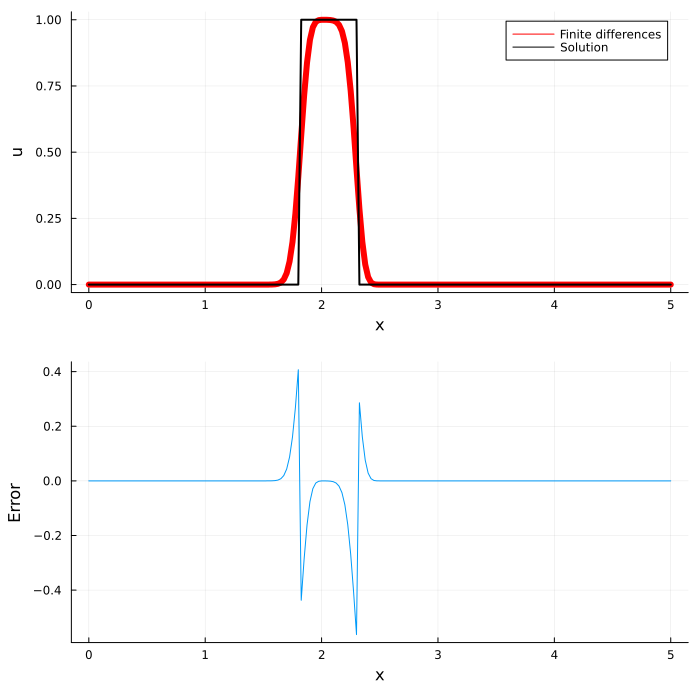

Δx: 0.025	 Δt:0.20000000000000004	 max error: 0.5628541020125899
Schéma de Law-Wendroff avec conditions 1


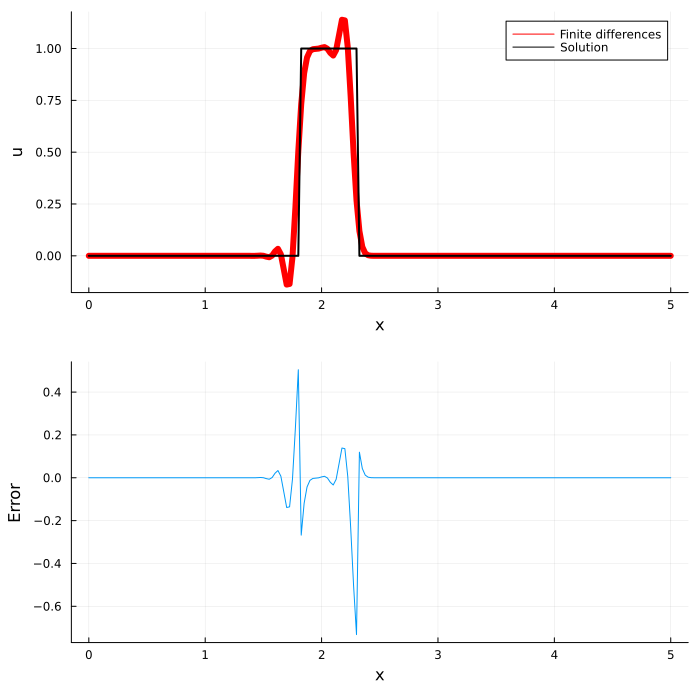

Δx: 0.025	 Δt:0.20000000000000004	 max error: 0.7321642239029105
Schéma explicite avce conditions 2


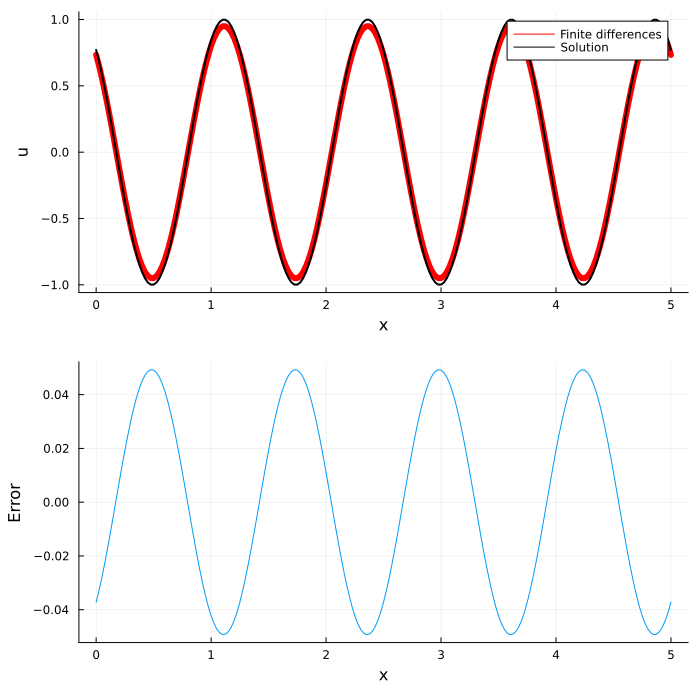

Δx: 0.025	 Δt:0.20000000000000004	 max error: 0.04925370341913582
Schéma de Lax-Wendroff avce conditions 2


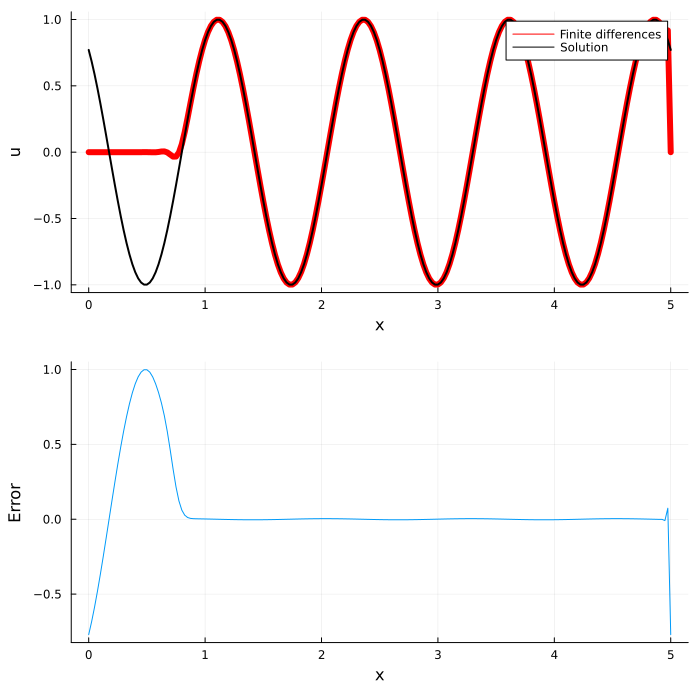

Δx: 0.025	 Δt:0.20000000000000004	 max error: 0.9981725383571556


In [81]:
# Paramètres
V = 0.1;L = 5;Nx = 200;x = range(0, L, length = Nx+1);Δx = x[2]-x[1];Δt = σ*Δx/V;Nt = 40;tf = Nt * Δt
# On fixe sigma à 0.8
σ = 0.8

# condition 1
condinit = x -> Float64.((x.>1.0) .& (x.<1.5)) 
u0 = condinit(x)

# Explicit scheme
u = u0
for n = 1:Nt
    uold = u
    u[2:end] = uold[2:end]-σ*(uold[2:end]-uold[1:end-1])
    u[1] = u[end]
end

println("Schéma explicite avce conditions 1")
uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

# Lax-Wendroff scheme
u0 = condinit(x)
u = u0
for n = 1:Nt
    uold = u
    u[2:end-1] = uold[2:end-1]-(σ/2)*(uold[3:end]-uold[1:end-2])+(σ*σ/2)*(uold[3:end]-2*uold[2:end-1]+uold[1:end-2])
    u[1] = u[end]
end

println("Schéma de Law-Wendroff avec conditions 1")
uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

# Conditon 2
condinit = x -> sin.(8*π*x/L)
u0 = condinit(x)

# Explicit scheme
u = u0
for n = 1:Nt
    uold = u
    u[2:end] = uold[2:end]-σ*(uold[2:end]-uold[1:end-1])
    u[1] = u[end]
end

println("Schéma explicite avce conditions 2")
uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

# Lax-Wendroff scheme
u0 = condinit(x)
u = u0
for n = 1:Nt
    uold = u
    u[2:end-1] = uold[2:end-1]-(σ/2)*(uold[3:end]-uold[1:end-2])+(σ*σ/2)*(uold[3:end]-2*uold[2:end-1]+uold[1:end-2])
    u[1] = u[end]
end

println("Schéma de Lax-Wendroff avce conditions 2")
uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))


- Quelles conditions tirez-vous ? 

On remarque que sigma doit rester entre 0 et 1 pour que les schémas restent stables et que Nt doit rester entre 30 et 1000 pour qu'on puisse bien observer la diffusion ou la dispersion d'un schéma.

- Augmenter progressivement $\sigma$ pour le schéma de Lax-Wendroff et observer. 

Plus σ s'approche de 1, plus on s'approche de la solution exacte. On remarque donc que la dispersion et la diffusion des schémas diminuent quand σ augmente.
Si σ dépasse 1, les schémas ne sont plus stables

- Que peut-on dire de la diffusion numérique observée précédemment dans le cas du schéma décentré ?

Avec les deux conditions initiales, on constate que le schéma décentré est diffusif car la représentation de la solution s'applatit à ses extremités.

- Le schéma de Lax-Wendroff est-il diffusif ?

Non, le schéma de Lax-Wendroff est dispersif car la représentation de la solution se disperse à ses extrémités. En effet, le schéma de Lax-Wendroff sert à empêcher la diffusion numérique.

## Exercice 3. Schéma de Lax-Wendroff implicite
On va changer le schéma comme suit :

$$
u_j^{n+1}=u_j^n-\frac{\sigma}{2}(u_{j+1}^n-u_{j-1}^n)+\frac{\sigma^2}{2}(u_{j+1}^{n+1}-2u_j^{n+1}+u_{j-1}^{n+1}).
$$ 

En introduisant $W^n = (u_j^n-\frac{\sigma}{2}(u_{j+1}^n-u_{j-1}^n))_j$ et
$U^n=(u_j^n)_j$,
le schéma s'écrit $AU^{n+1}=W^n$. On pourra utiliser la
condition de périodicité directement dans le schéma numérique afin d'éliminer $u_j^N$. On constate que le schéma est implicite : l'évaluation de $U^{n+1}$ à partir
de $U^n$ nécessite la résolution d'un système linéaire, et le coût
de l'itération sera plus élevé que dans le cas d'un
schéma explicite. Cependant le schéma n'est pas limité par la
valeur du nombre de Courant $\sigma$ ce qui permet d'utiliser des
pas de temps plus grands et donc de diminuer le nombre d'itérations associé.

Deux options sont possibles pour la boucle en temps : 
- soit résoudre le système linéaire à chaque pas de temps (factorisation, pas inversion !)
- soit factoriser la matrice $A$ une fois pour toutes avant la boucle (par exemple sous la forme $A=LU$), puis réutiliser cette factorisation.

Comparer ces différentes options pour la résolution
du systéme linéaire en observant le temps d'execution et en augmentant progressivement la taille du système à résoudre. Réaliser des expériences numériques en
faisant varier le nombre de Courant. Discuter les performances relatives des schémas implicite et explicite en termes de temps de calcul.

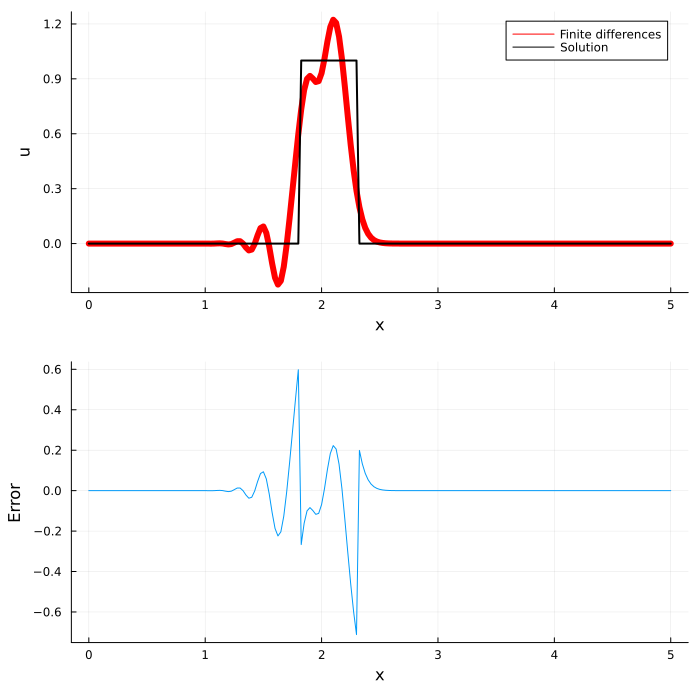

Δx: 0.025	 Δt:0.20000000000000004	 max error: 0.7118792790408006


In [83]:
# Parameters
V = 0.1                                             # advection speed
L = 5                                               # domain length
Nx = 200                                            # space grid size
x = range(0, L, length = Nx+1)                      # space grid
Δx = x[2]-x[1]                                      # space stepsize
σ = 0.8                                               # Courant number
Δt = σ*Δx/V                                         # time stepsize
Nt = 40                                             # time grid size     
tf = Nt * Δt                                        # final time
condinit = x -> Float64.((x.>1.0) .& (x.<1.5))      # characteristic function
#condinit = x -> sin.(8*π*x/L)                      # sine pulse
u0 = condinit(x)   

a =  -(σ^2)/2 # coefficient sur les sous diagonales et dans chaque coin
b =  1+σ^2 # coefficient sur la diagonale

A = Tridiagonal(a*ones(Nx),b*ones(Nx+1),a*ones(Nx))

B = zeros(Nx+1,Nx+1)
B[1,end] = a
B[end,1] = a
A = A+B 

w = zeros(Nx+1,1)
u = u0

for n=1:Nt
    uold = u
    w[2:end-1] = u[2:end-1]-(σ/2)*(u[3:end]-u[1:end-2])
    w[1] = condinit(x[1]-V*n*Δt)
    w[end] = w[1]
    u = A\w
end


uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

On remarque que le schéma implicite de Lax-Wendroff est également dispersif. 

La solution du schéma est plus précise si on augmente Nx.

On observe également une plus grande dispersion lorsqu'on augmente Nt.